In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

data = pd.read_csv("./hotel.csv")

X = data.drop(["is_canceled"], axis=1)
y = data.is_canceled

In [64]:
X["arrival_date_month"] = X["arrival_date_month"].map({
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December":12
})

In [65]:
numerical_features = [col for col in X.columns if X[col].dtype in ["int64","float64"]]


In [77]:
low_cardinality_cols = [col for col in X.columns if X[col].dtype == "object" and X[col].nunique() < 13]

In [78]:
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"),
    StandardScaler()
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = make_column_transformer(
    (transformer_num, numerical_features),
    (transformer_cat, low_cardinality_cols)
)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=0)

In [79]:
X_train = preprocessor.fit_transform(X_train)


In [80]:
X_valid = preprocessor.transform(X_valid)

In [81]:
input_shape = [X_valid.shape[1]]
input_shape

[71]

29

In [87]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
    
]
    
)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"])

In [92]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience = 50,
    restore_best_weights = True
)

history = model.fit(X_train, y_train, validation_data = [X_valid, y_valid], verbose=True, batch_size=512, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.9999 - loss: 4.4024e-04 - val_binary_accuracy: 0.9999 - val_loss: 2.5150e-04
Epoch 2/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 1.0000 - loss: 1.8225e-04 - val_binary_accuracy: 1.0000 - val_loss: 1.7379e-07
Epoch 3/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 1.0000 - loss: 5.2506e-05 - val_binary_accuracy: 1.0000 - val_loss: 9.0733e-08
Epoch 4/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 1.0000 - loss: 8.1590e-07 - val_binary_accuracy: 1.0000 - val_loss: 1.6709e-07
Epoch 5/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 1.0000 - loss: 1.1829e-06 - val_binary_accuracy: 1.0000 - val_loss: 1.5625e-07
Epoch 6/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 1.0000 - loss: 5.7889e-07 - val_binary_accuracy: 1.0000 - val_loss: 1.5161e-07
Epoch 7/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 1.0000 - loss: 

<Axes: title={'center': 'Binary accuracy'}>

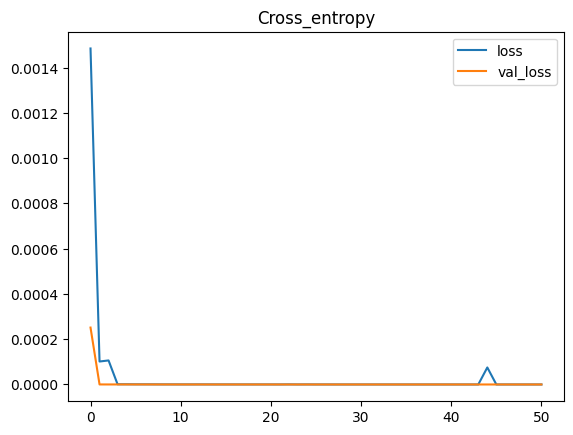

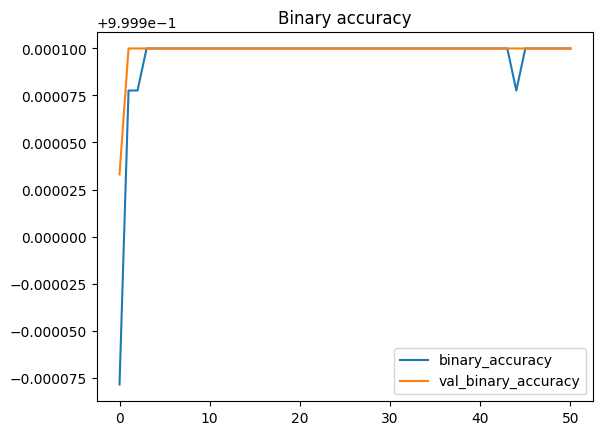

In [93]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,["loss", "val_loss"]].plot(title="Cross_entropy")
history_df.loc[:,["binary_accuracy", "val_binary_accuracy"]].plot(title="Binary accuracy")

In [94]:
history_df.loc[:,"val_binary_accuracy"].max()


1.0